### Créer la matrice d'adjacence:

Avec un masque et des valeurs de tenseurs de diffusion

In [1]:
!python build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph

### Afficher le graphe: 

Figure(640x480)


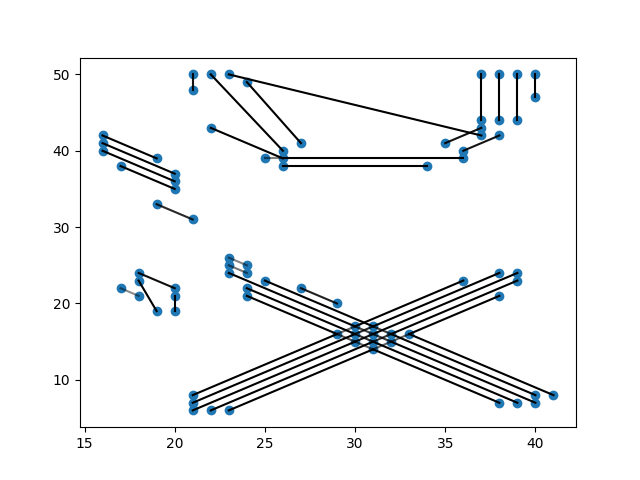

In [5]:
from IPython.display import Image, display  # type: ignore
!python draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))


### Filtrer le graphe pour avoir uniquement les noeuds fortement connectés:

In [3]:
!python build_adj_matrix.py ../data/wm.nii.gz ../data/fodf.nii.gz graph --threshold 0.4


Figure(640x480)


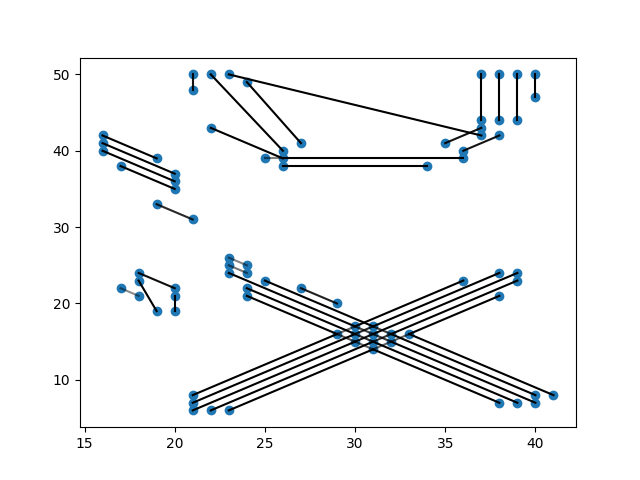

In [4]:
!python draw_adj_matrix.py graph.npz
display(Image(filename='graph_adj_mat.png'))

### Créer une matrice d'adjacence aléatoire:

In [5]:
!python build_random_adj_matrix.py 5 6 True rand_graph

4
6


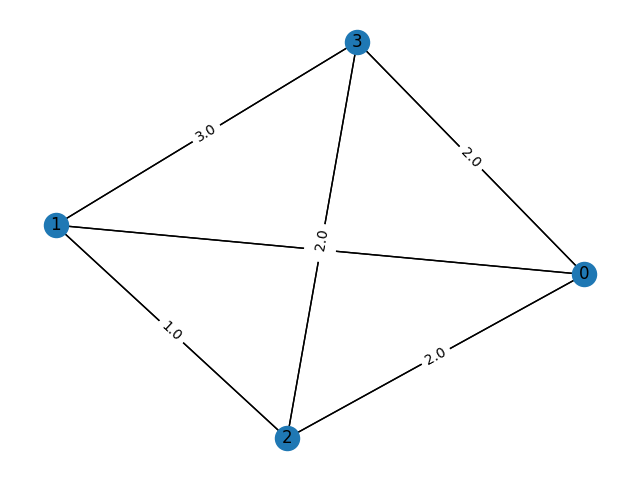

In [6]:
!python draw_random_adj_matrix.py rand_graph rand_graph_visu
display(Image(filename='rand_graph_visu.png'))

### Lancer l'algorithme de qaoa pour maximiser la valeur absolue des poids: 

nom de la matrice d'adjacence, noeud départ, noeud fin, nom du fichier d'infos, valeurs de la constante de pénalité, nombre de répétitions de QAOA, nombre de processeurs 

In [2]:
!python find_max_intensity_diffusion_path.py rand_graph 1 0 qaoa_solver_infos --alphas 1 2 3  --reps 1 --multiprocess -npr 2

------------------------MULTIPROCESS SOLVER FINISHED-------------------------------


### Visualiser les chemins qui maximise la valeur absolue des poids:

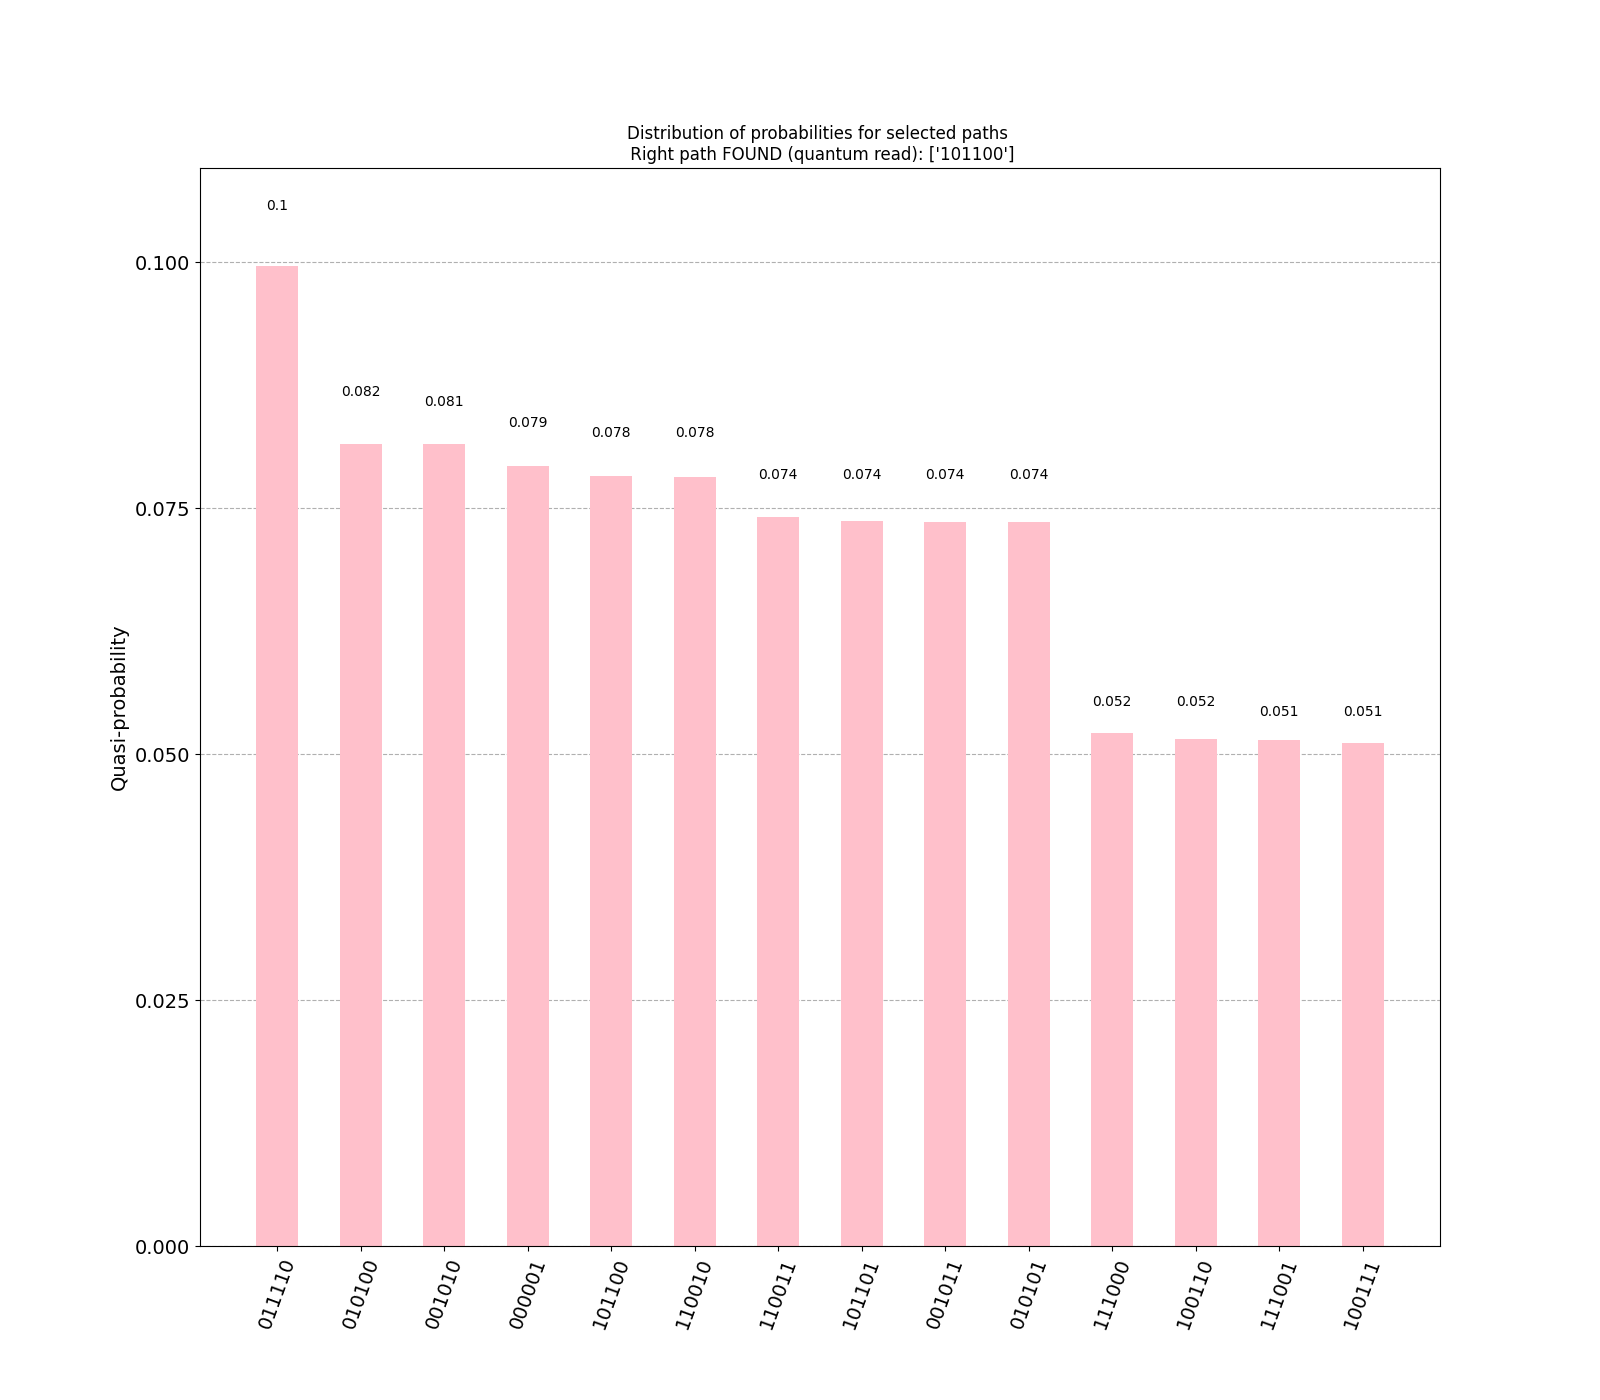

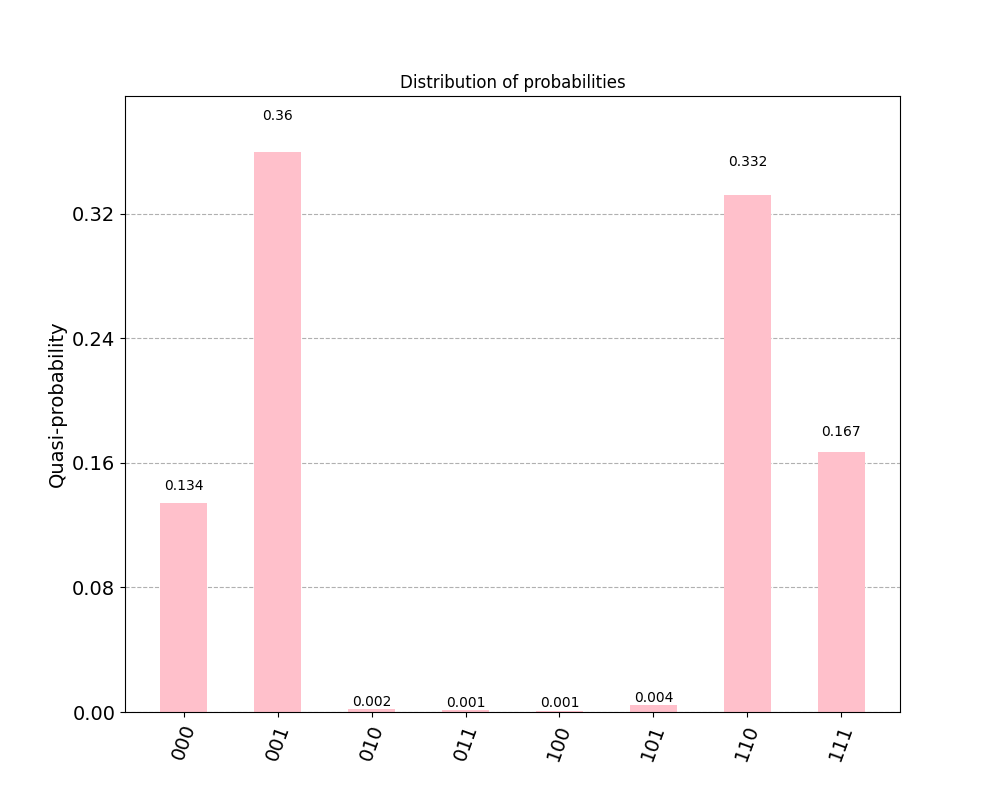

In [6]:
!python plot_distribution_probabilities.py qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz visu_total_dist visu_selected_dist
display(Image(filename='visu_selected_dist_1.png'))
display(Image(filename=r'..\output\img\visu_tout_alpha_4.png'))

### Visualiser les chemins optimaux:

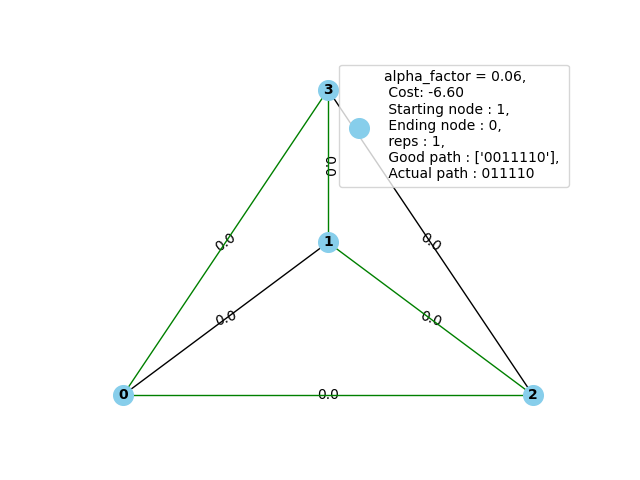

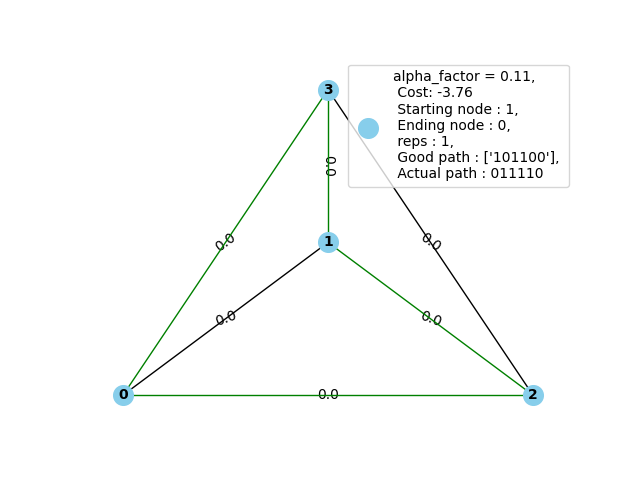

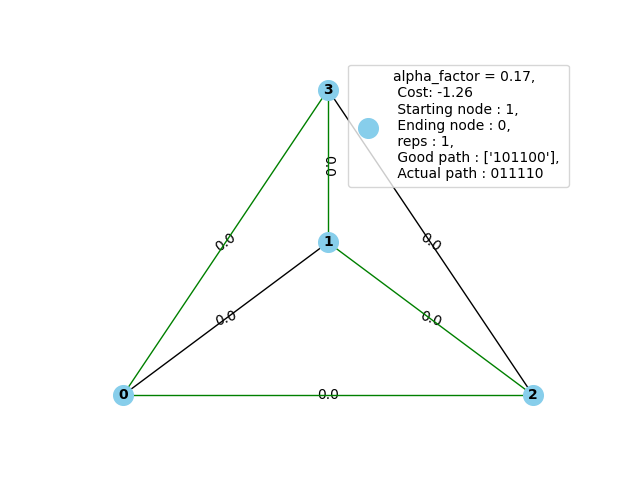

In [7]:
!python plot_optimal_paths.py graph qaoa_solver_infos_alpha_1.npz qaoa_solver_infos_alpha_2.npz qaoa_solver_infos_alpha_3.npz opt_paths
display(Image(filename='opt_paths_0_alpha_1.00.png'))
display(Image(filename='opt_paths_1_alpha_2.00.png'))
display(Image(filename='opt_paths_2_alpha_3.00.png'))